In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
def imshow(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [15]:
def cv2_show(caption, im):
    cv2.imshow(caption,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [16]:
def rotate_image(img, ang):
    angle = math.radians(ang)   
    cosx = math.cos(angle)
    sinx = math.sin(angle)
    r,c = img.shape
    shift = (int(c/2),int(r/2)) 
    out = np.zeros_like(img, dtype='u1') 
    T = np.float32([[1, 0, -shift[0]], [0, 1, -shift[1]]])
    Tr = np.float32([[1, 0, shift[0]], [0, 1,  shift[1]]])
    R = np.array([[cosx,-sinx, 0],[sinx, cosx, 0]])
    for i in range(r):
        for j in range(c):
            x = j
            y = i
            xy = np.array([x, y, 1])
            new_xy = np.dot(T, xy)  
            xy = np.array([int(new_xy[0]), int(new_xy[1]), 1])
            new_xy = np.dot(R, xy)  
            xy = np.array([int(new_xy[0]), int(new_xy[1]), 1])
            new_xy = np.dot(Tr, xy)  
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            if 0 <= xn < c and 0 <= yn < r:
                out[yn,xn] = img[y,x]
    return out.astype(np.uint8)


In [17]:
def scale_image(img, S):
    r,c = img.shape
    shift = (int(c/2),int(r/2)) 
    T = np.float32([[1, 0, -shift[0]], [0, 1, -shift[1]]])
    Tr = np.float32([[1, 0, shift[0]], [0, 1,  shift[1]]])
    Sx, Sy = S[0], S[1]
    S = np.array([[Sx,0, 0],[0, Sy, 0]])
    out = np.zeros_like(img, dtype='u1')  
    for i in range(r):
        for j in range(c):
            x = j
            y = i
            xy = np.array([x, y, 1])
            new_xy = np.dot(T, xy)  
            xy = np.array([int(new_xy[0]), int(new_xy[1]), 1])
            new_xy = np.dot(S, xy)  
            xy = np.array([int(new_xy[0]), int(new_xy[1]), 1])
            new_xy = np.dot(Tr, xy)              
            xn = int(new_xy[0])
            yn = int(new_xy[1])
            if 0 <= xn < c and 0 <= yn < r:
                out[yn,xn] = img[y,x]
    return out.astype(np.uint8)


In [18]:
def flip_image(img, choice):
    r,c = img.shape
    out = np.zeros_like(img, dtype='u1') 
    for i in range(r):
        for j in range(c):
            if choice == 1:
                out[r-i-1,c-j-1] = img[i,j]
            elif choice == 2:
                out[r-i-1,j] = img[i,j]
            elif choice ==3 :
                out[i,c-j-1] = img[i,j]
    return out.astype(np.uint8)

In [19]:
img = cv2.imread('./images/cameraman.png', 0)

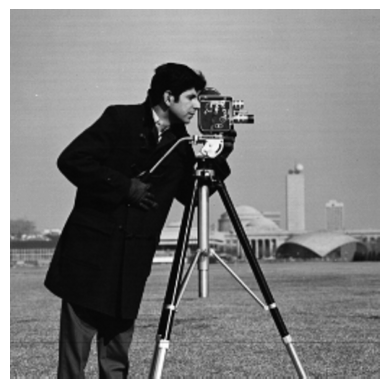

In [20]:
imshow(img)

In [21]:
imF = flip_image(img, 3)
scales = (0.5, 0.5)  
imS = scale_image(imF, scales)

In [22]:
result = np.zeros_like(img)
ang = -45
result = rotate_image(imS, ang)

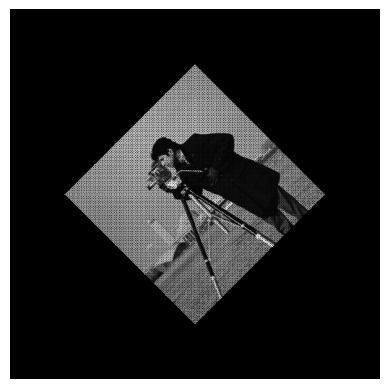

In [23]:
imshow(result)
out = cv2.hconcat([img, result])
# plt.savefig('./outs/hw1.png')

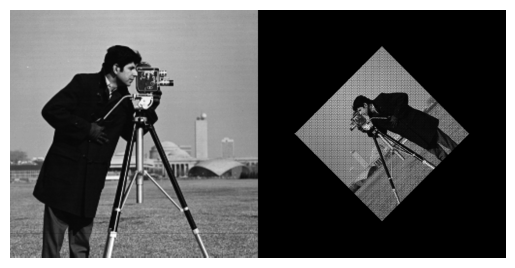

In [24]:
out = cv2.hconcat([img, result])
imshow(out)
plt.savefig('./outs/hw1.png')